In [2]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



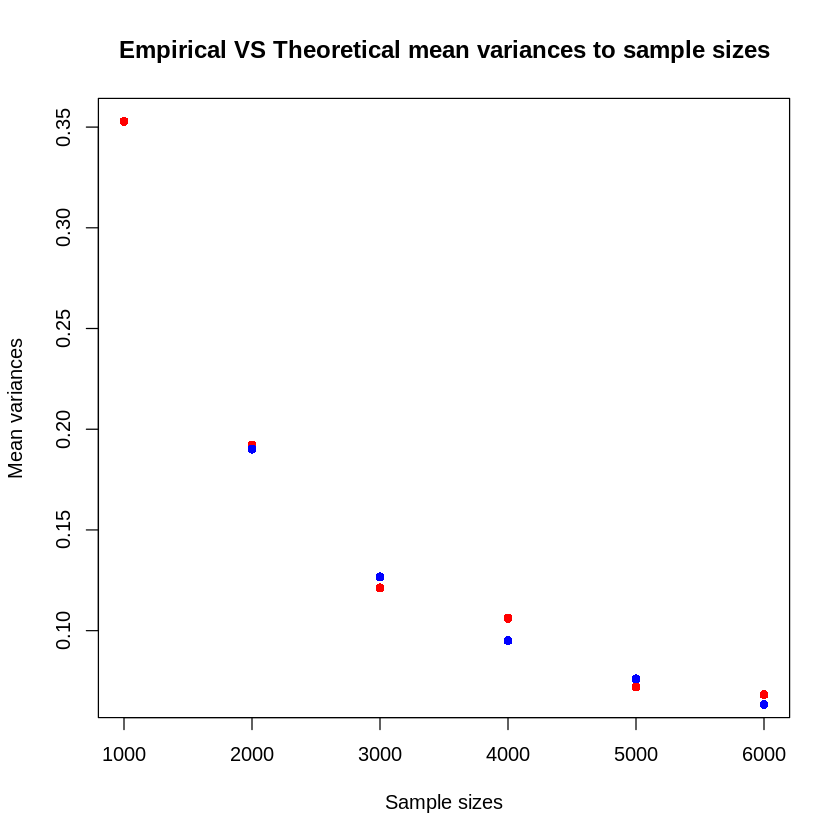

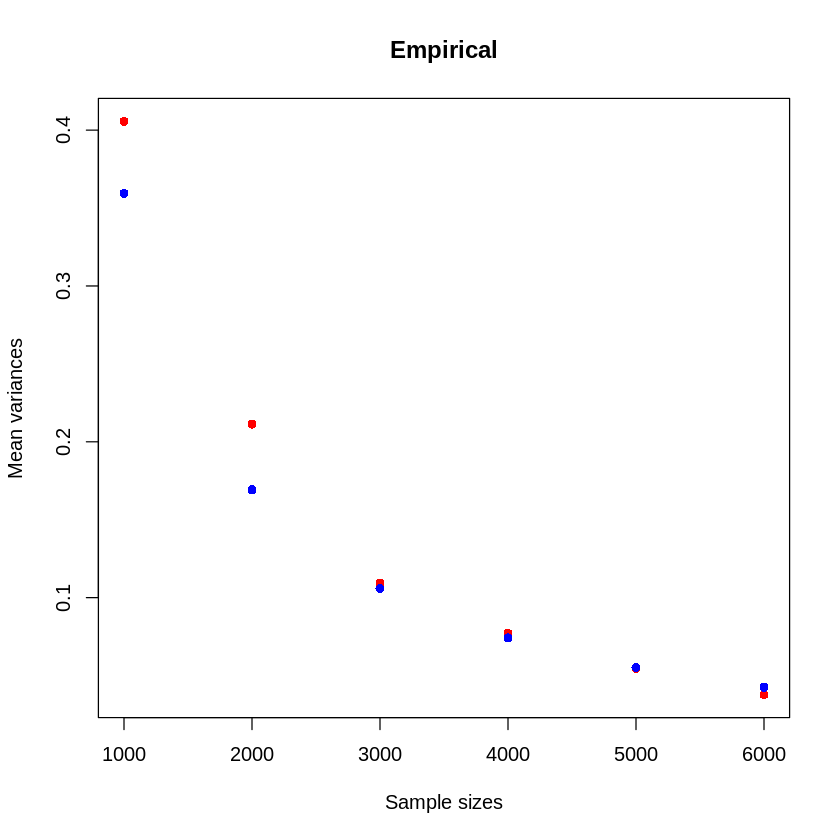

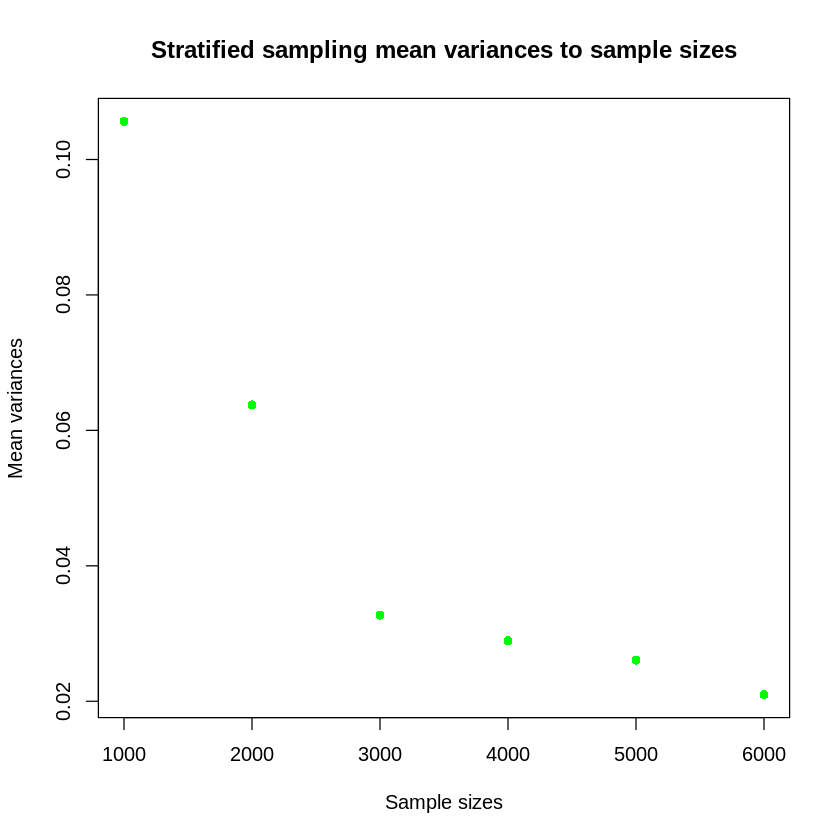

In [3]:
library(dplyr)

fifa <- read.csv(file = 'fifa_clean.csv')
fifa=fifa[sample(nrow(fifa)),]

#dividing the population into stratas
compute_stratas <- function(data) {
  
  forwards <- c("ST","CF","RW","LW","LS","RS","LF","RF")
  midfield_postions <- c('CM','LM','LCM','RM','RCM','CDM','LDM','RDM','CAM','LAM','RAM')
  defender_positions <-c('CB','RB','LB','LCB','RCB','RWB','LWB')
  
  
  forwards_p <- data[data$Position %in% forwards,]
  midfielders_p <- data[data$Position %in% midfield_postions,]
  defenders_p <- data[data$Position %in% defender_positions,]
  gks_p <- data[data$Position == "GK",]
  
  dfs = list(forwards_p,midfielders_p,defenders_p,gks_p)
  
  return (dfs)
  
}



ratio = function(data,n) {
  return (nrow(data)/n)
}



theoretical_replacement = function(var, ss, ps) {
  return (var/ss)
}

theoretical_no_replacement = function(var ,ss , ps) {
  p_var = var/ss
  sample_weight = (ss-1)/(ps-1)
  return(p_var*(1-sample_weight))
}


stratified_sampling = function (population, sample_size){
  
  n = nrow(population)
  strata = compute_stratas(population)
  stratified_sample = c()
  p_dist = c()
  
  for (s in strata) {
    p_dist = append(p_dist,ratio(s,n))
  }
  p_dist = round(p_dist,2)
  
  
  i = 1 
  
  for (s in strata) {
    
    r = p_dist[i]
    strata_size = sample_size*r
    data_points = sample_n(s,strata_size,replace = TRUE)
    
    stratified_sample = append(stratified_sample,data_points$Finishing)
    i = i+1
  }
  return(stratified_sample)
  
  
}



sampling_experiment <- function(population,replace=TRUE,sampling_algorithm =1,theoretical_formula) {
  
  #empty vector for variances
  variances <- c()
  
  #empty vector for theoretical variances
  theoretical_vars <- c()
  
  #population variance
  pop_var <- var(population$Finishing)
  
  n_tries <- 200
  
  pop_size <- nrow(population)
  
  
  sam_sizes <- c(1000, 2000, 3000,4000, 5000, 6000)
  
  for (each_sample_size in sam_sizes) {
    
    means <- c()
    
    for (i in 1:n_tries){
      my_sample <- c()
      # prob=rep(1/pop_size, times=pop_size)
      if(sampling_algorithm == 1 ) {
        my_sample <- sample(population$Finishing, size = each_sample_size, replace)
        
        
      } else {
        my_sample <-  stratified_sampling(population,each_sample_size)
        
      }
      means <- append(means ,mean(my_sample,na.rm = TRUE))
      my_sample <- c()
    }
    variances <- append(variances, var(means,na.rm = TRUE))
    
    theoretical_vars <- append(theoretical_vars, theoretical_formula(pop_var,each_sample_size,pop_size))
  }
  return(list(variances, theoretical_vars))
}



# sampling with replacement 

srr = sampling_experiment(fifa,TRUE,1,theoretical_replacement)

x1 = c(1000, 2000, 3000,4000, 5000, 6000)
y1 = srr[[1]]

x2 = c(1000, 2000, 3000,4000, 5000, 6000)
y2 = srr[[2]]

plot(x1, y1, main="Empirical VS Theoretical mean variances to sample sizes",
     xlab = "Sample sizes", ylab="Mean variances", col="red", pch = 16)
points(x2, y2, col="blue", pch = 16)


# sampling without replacement 
ssr1 = sampling_experiment(fifa,FALSE,1,theoretical_no_replacement)

x3 = c(1000, 2000, 3000,4000, 5000, 6000)
y3 = ssr1[[1]]

x4 = c(1000, 2000, 3000,4000, 5000, 6000)
y4 = ssr1[[2]]

plot(x3, y3, main="Empirical",
     xlab = "Sample sizes", ylab="Mean variances", col="red", pch = 16)
points(x4, y4, col="blue", pch = 16)


# stratified sampling 
stratified_sampling2 = sampling_experiment(fifa,TRUE,0,theoretical_replacement)

x5 =c(1000, 2000, 3000,4000, 5000, 6000)
y5 = stratified_sampling2[[1]]

plot(x5, y5, main="Stratified sampling mean variances to sample sizes",
   xlab = "Sample sizes", ylab="Mean variances", col="green", pch = 16)